In [9]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
%matplotlib inline

### Read the input file 'Diabetes.csv' using Pandas and check it's column names(1 Marks)

In [10]:
diab_df=pd.read_csv("Diabetes.csv")

In [11]:
# Eye ball the imported dataset

diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
diab_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [12]:
diab_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Check dimension of dataset

In [13]:
diab_df.shape

(768, 9)

In [14]:
diab_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Check distribution of dependent variable, Outcome and plot it (1 Marks)

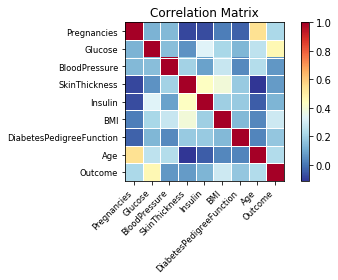

In [15]:
corr=diab_df.corr()
import statsmodels.graphics.api as smg
smg.plot_corr(corr, xnames=list(corr.columns))
plt.show()

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [16]:
# Check data types and info of dataset

diab_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Check data distribution using summary statistics and provide your findings(2 Marks)

In [17]:
diab_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


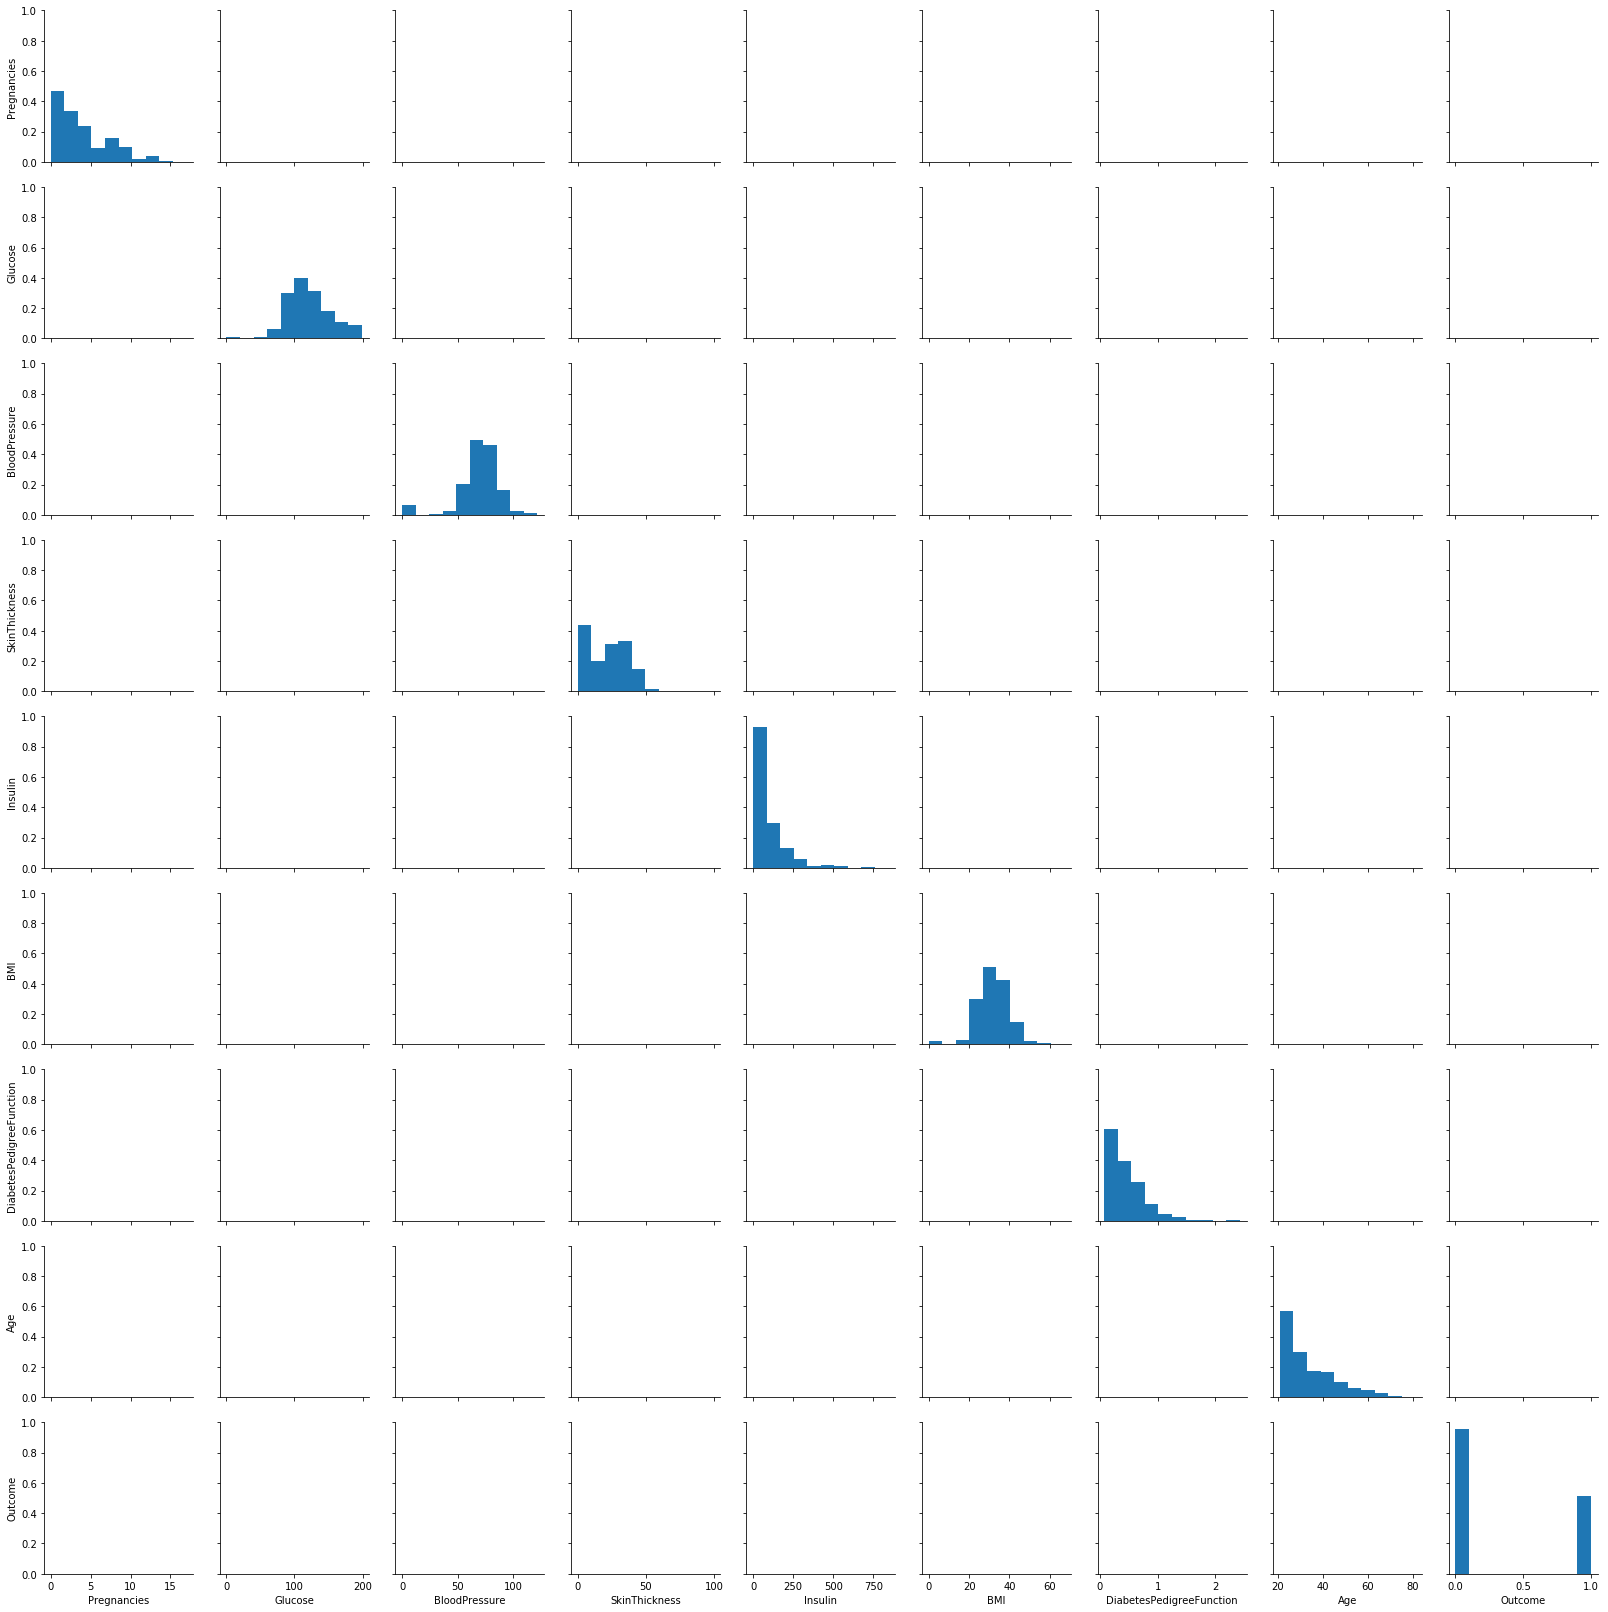

In [18]:
import seaborn as sns
sns.pairplot(diab_df, kind="kde")

# Observation
#1 - All data points are numerical
#2 - 9 dimenson including outcome target
#3 - Features to be standardized

### Do correlation analysis and bivariate viualization with Insights(1 Marks)

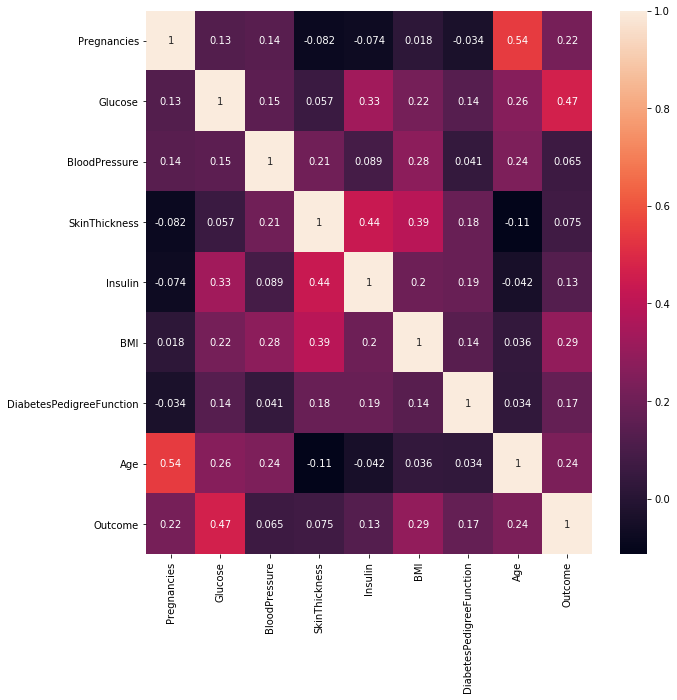

In [19]:
plt.figure(figsize=(10,10))

sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True);

#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable(1 Marks)

In [20]:
X=diab_df.drop('Outcome',axis=1)
y=diab_df['Outcome']




In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=2)

In [22]:
print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

Training dataset shape: (537, 8) (537,)
Testing dataset shape: (231, 8) (231,)


### Train Support Vector Machine Model(1 Marks)

In [23]:
# use from sklearn.svm import SVC

from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

In [24]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [25]:
X.shape

(768, 8)

In [26]:


cval=0.01
svc = svm.SVC(C=cval, kernel='linear').fit(x_train, y_train)
k=svc.predict(np.array(x_test))
print ("svc score for C value =",cval, " is ", svc.score(x_test, y_test), "and accuracy score is ",accuracy_score(y_test, k))

cval=1
svc = svm.SVC(C=cval, kernel='linear').fit(x_train, y_train)
k=svc.predict(np.array(x_test))
print ("svc score for C value =",cval, " is ", svc.score(x_test, y_test), "and accuracy score is ",accuracy_score(y_test, k))


cval=10
svc = svm.SVC(C=cval, kernel='linear').fit(x_train, y_train)
k=svc.predict(np.array(x_test))
print ("svc score for C value =",cval, " is ", svc.score(x_test, y_test), "and accuracy score is ",accuracy_score(y_test, k))




svc score for C value = 0.01  is  0.7619047619047619 and accuracy score is  0.7619047619047619
svc score for C value = 1  is  0.7748917748917749 and accuracy score is  0.7748917748917749
svc score for C value = 10  is  0.7922077922077922 and accuracy score is  0.7922077922077922


# your insights


# As the C value increases, the accuracy  score increases.

### Scale the data points using MinMaxScaler ( 1 Marks)

In [27]:

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()


# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(X)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)

df_normalized

,0,1,2,3,4,5,6,7
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,0.083333
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.133333
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,0.533333
9,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,0.550000


### Fit SVM Model on Scale data and give your observation( 1 Marks)

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
feature_train, feature_test, target_train, target_test= train_test_split(df_normalized, y, test_size= 0.30)

In [30]:
X=feature_train
y=target_train
X=np.array(X)
y=np.array(y)

In [31]:
svc = svm.SVC(C=0.01, kernel='linear').fit(X, y)

In [32]:
k=svc.predict(np.array(feature_test))
accuracy_score(target_test, k)

0.670995670995671

#we can try increasing either C or gamma to fit a more complex model.

### Try improving the model accuracy using C=1000 (1 Marks)

In [33]:
cval=1000
svc = svm.SVC(C=cval, kernel='linear').fit(feature_train, target_train)
k=svc.predict(np.array(feature_test))
print ("svc score for normalized x values with C value =",cval, " is ", svc.score(x_test, y_test))

svc score for normalized x values with C value = 1000  is  0.35064935064935066


### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

#No...Increasing c value does not guarentee the model improvement

In [35]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [36]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [38]:
from sklearn.svm import SVC
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [41]:
gs.fit(feature_train, target_train) 

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=12,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [42]:
gs.best_estimator_

SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
gs.best_score_ 

0.7802607076350093